In [133]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [134]:
df = pd.read_csv("C:/Users/Dell/Desktop/datasets/Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [135]:
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [136]:
train = df.loc[:,['Open']].values
#values using for converting array

In [137]:
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [139]:
#normalization (scaling the values by using mimmax scaler)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)

In [140]:
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

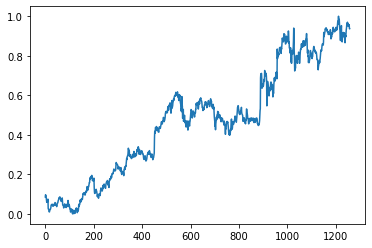

In [141]:
#visualize the trained data

plt.plot(train_scaled)

In [142]:
# creating a data structure with 50 timesteps and 1 output
#based on which RNN will predict the 61st price. Here the number of past timestamps is set to 60 based on experimentation.
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps,len(train_scaled)):
    X_train.append(train_scaled[i-timesteps:i, 0])  #0:50-->1:51-->2:52-->3:53-->4-54 
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [143]:
#reshaping

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [144]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [145]:
#1208 rows,50 columns,1 dimension(indicator)
X_train.shape

(1208, 50, 1)

In [146]:
y_train.shape

(1208,)

In [147]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

# Creating RNN model

In [148]:
# Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [149]:
#Initialising the RNN
model = Sequential()

In [150]:
#Adding the first RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50, activation = 'tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

In [151]:
#Adding the 2nd RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50, activation = 'tanh', return_sequences = True))
model.add(Dropout(0.2))

In [152]:
# Adding a third RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
model.add(Dropout(0.2))

In [153]:
# Adding a fourth RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

In [154]:
#Adding the output layer

model.add(Dense(units = 1))

In [155]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_12 (SimpleRNN)    (None, 50, 50)            2600      
_________________________________________________________________
dropout_12 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 50, 50)            5050      
_________________________________________________________________
dropout_13 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 50, 50)            5050      
_________________________________________________________________
dropout_14 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 50)               

# Compiling the RNN

In [156]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [157]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1208/1208 [==============================] - 6s 5ms/step - loss: 0.3500
Epoch 2/20
1208/1208 [==============================] - 3s 3ms/step - loss: 0.2194
Epoch 3/20
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1535
Epoch 4/20
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1231
Epoch 5/20
1208/1208 [==============================] - 3s 3ms/step - loss: 0.0829
Epoch 6/20
1208/1208 [==============================] - 3s 3ms/step - loss: 0.0725A: 0s - loss: 0.0
Epoch 7/20
1208/1208 [==============================] - 3s 3ms/step - loss: 0.0517
Epoch 8/20
1208/1208 [==============================] - 3s 3ms/step - loss: 0.0478
Epoch 9/20
1208/1208 [==============================] - 3s 3ms/step - loss: 0.0435A: 
Epoch 10/20
1208/1208 [==============================] - 3s 3ms/step - loss: 0.0340
Epoch 11/20
1208/1208 [==============================] - 3s 3ms/step - loss: 0.0317
Epoch 12/20
1208/1208 [==============================] - 3s 3ms/s

In [158]:
test_data = pd.read_csv("C:/Users/Dell/Desktop/datasets/Google_Stock_Price_Test.csv")

In [159]:
test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [160]:
real_stock_price = test_data.loc[:, ['Open']].values

In [161]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [162]:
df['Open'][-60:] #last 60 prices for open

1198    779.00
1199    779.66
1200    777.71
1201    786.66
1202    783.76
1203    781.22
1204    781.65
1205    779.80
1206    787.85
1207    798.24
1208    803.30
1209    795.00
1210    804.90
1211    816.68
1212    806.34
1213    801.00
1214    808.35
1215    795.47
1216    782.89
1217    778.20
1218    767.25
1219    750.66
1220    774.50
1221    783.40
1222    779.94
1223    791.17
1224    756.54
1225    755.60
1226    746.97
1227    755.20
1228    766.92
1229    771.37
1230    762.61
1231    772.63
1232    767.73
1233    764.26
1234    760.00
1235    771.53
1236    770.07
1237    757.44
1238    744.59
1239    757.71
1240    764.73
1241    761.00
1242    772.48
1243    780.00
1244    785.04
1245    793.90
1246    797.40
1247    797.34
1248    800.40
1249    790.22
1250    796.76
1251    795.84
1252    792.36
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, dtype: float64

In [163]:
#we need to concatenate the train and test datasets for prediction,because we use the previous 60 days
total_data = pd.concat((df['Open'][-60:], test_data['Open']),axis=0)

In [164]:
total_data

1198    779.00
1199    779.66
1200    777.71
1201    786.66
1202    783.76
         ...  
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, Length: 80, dtype: float64

In [165]:
total = np.array(total_data)

In [187]:
total.size

80

In [167]:
type(total)

numpy.ndarray

In [168]:
total = total.reshape(-1,1)
total.shape

(80, 1)

In [169]:
total = scaler.transform(total) #minmax scaler
total

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [175]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])

In [176]:
X_test

[array([0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
        0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
        0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
        0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
        0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
        0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
        0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
        0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
        0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
        0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146]),
 array([0.95966962, 0.97808617, 1.        , 0.98076494, 0.97083116,
        0.98450406, 0.96054394, 0.9371419 , 0.92841729, 0.90804747,
        0.8771858 , 0.92153434, 0.93809063, 0.93165414, 0.95254483,
        0.88812412, 0.88637547, 0.87032145, 0.88563137, 0.90743359,
        0.91571173, 0.89941588, 0.91805566, 0.

In [177]:
X_test = np.array(X_test)
X_test.shape

(20, 50)

In [178]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [179]:
X_test

array([[[0.97510976],
        [0.95966962],
        [0.97808617],
        [1.        ],
        [0.98076494],
        [0.97083116],
        [0.98450406],
        [0.96054394],
        [0.9371419 ],
        [0.92841729],
        [0.90804747],
        [0.8771858 ],
        [0.92153434],
        [0.93809063],
        [0.93165414],
        [0.95254483],
        [0.88812412],
        [0.88637547],
        [0.87032145],
        [0.88563137],
        [0.90743359],
        [0.91571173],
        [0.89941588],
        [0.91805566],
        [0.9089404 ],
        [0.9024853 ],
        [0.89456061],
        [0.91600938],
        [0.9132934 ],
        [0.88979835],
        [0.86589404],
        [0.89030062],
        [0.90335962],
        [0.89642086],
        [0.91777662],
        [0.93176576],
        [0.94114145],
        [0.95762334],
        [0.96413424],
        [0.96402262],
        [0.96971501],
        [0.95077759],
        [0.96294367],
        [0.96123223],
        [0.95475854],
        [0

In [180]:
predicted_stock_price = model.predict(X_test)

In [181]:
predicted_stock_price

array([[0.96508795],
       [0.96198136],
       [0.9573298 ],
       [0.9595316 ],
       [0.9628776 ],
       [0.9596777 ],
       [0.963398  ],
       [0.9688321 ],
       [0.9777914 ],
       [0.9795607 ],
       [0.9876293 ],
       [0.98985654],
       [0.9935749 ],
       [0.9819947 ],
       [0.9843699 ],
       [0.9866419 ],
       [0.9931271 ],
       [0.99970734],
       [1.0067433 ],
       [1.008794  ]], dtype=float32)

In [182]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [183]:
predicted_stock_price

array([[797.91266],
       [796.2427 ],
       [793.74225],
       [794.92584],
       [796.7245 ],
       [795.00433],
       [797.0042 ],
       [799.92535],
       [804.7415 ],
       [805.6926 ],
       [810.02997],
       [811.2273 ],
       [813.22614],
       [807.0011 ],
       [808.27783],
       [809.4992 ],
       [812.9854 ],
       [816.52264],
       [820.30493],
       [821.4072 ]], dtype=float32)

# Visualization

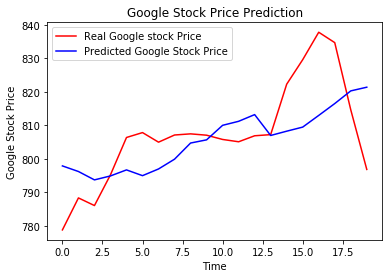

In [186]:
plt.plot(real_stock_price, color = 'red', label='Real Google stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()